In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./uber.csv")

In [4]:
df = data.copy()

In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [9]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
df.corr(numeric_only=True)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000587,0.000230,-0.000341,0.000270,0.000271,0.002259
fare_amount,0.000587,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.000230,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.000341,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.000270,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,0.000271,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.002259,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


<Axes: >

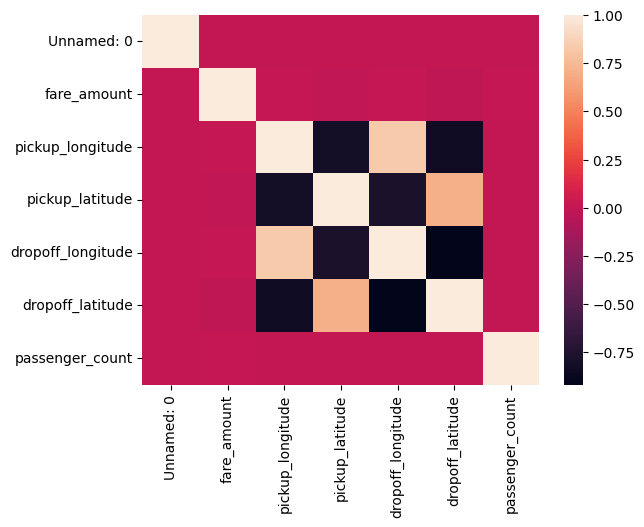

In [16]:
sns.heatmap(df.corr(numeric_only=True))

{'whiskers': [<matplotlib.lines.Line2D at 0x299e4d85610>,
 'caps': [<matplotlib.lines.Line2D at 0x299e4d86b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x299e4d84b50>],
 'medians': [<matplotlib.lines.Line2D at 0x299e4d90290>],
 'fliers': [<matplotlib.lines.Line2D at 0x299e4d90d10>],
 'means': []}

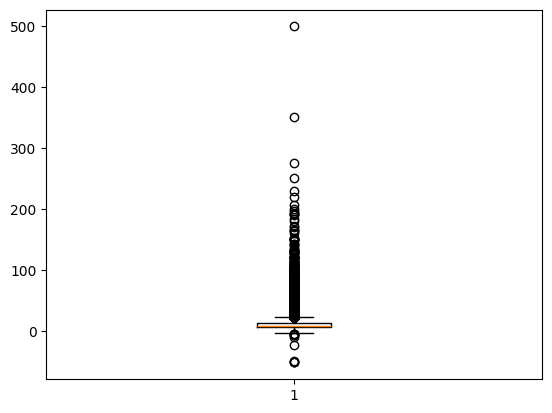

In [24]:
plt.boxplot(df['fare_amount'])

In [25]:
flow = df['fare_amount'].quantile(0.01)
fhigh = df['fare_amount'].quantile(0.99)

df = df[(df['fare_amount'] > flow) & (df['fare_amount'] < fhigh)]

{'whiskers': [<matplotlib.lines.Line2D at 0x299e4de9010>,
 'caps': [<matplotlib.lines.Line2D at 0x299e4dea910>,
 'boxes': [<matplotlib.lines.Line2D at 0x299e4de83d0>],
 'medians': [<matplotlib.lines.Line2D at 0x299e4debf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x299e4df4a50>],
 'means': []}

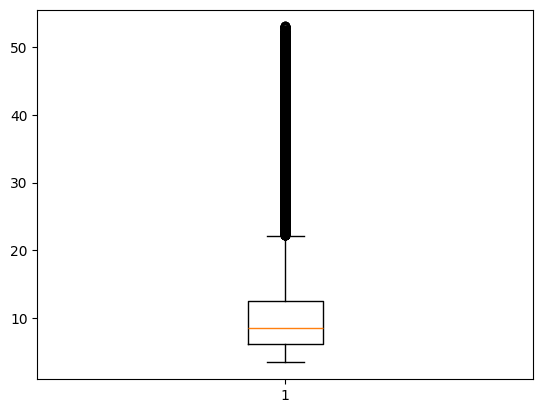

In [26]:
plt.boxplot(df['fare_amount'])

In [27]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [36]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [37]:
X

,Unnamed: 0,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199994,3189201,2014-01-31 14:42:00.000000181,2014-01-31 14:42:00+00:00,-73.983070,40.760770,-73.972972,40.754177,1
199996,16382965,2014-03-14 01:09:00.0000008,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


In [38]:
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199994    12.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 194911, dtype: float64

In [39]:
X['pickup_datetime'] = pd.to_datetime(X['pickup_datetime'])
X = X.loc[:, X.columns.str.contains('^Unnamed')]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lregressor = LinearRegression()
lregressor.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = lregressor.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test, y_pred)

In [48]:
print(f"Mean Squared Error: {rmse}  Rsquared Error: {r2score}")

Mean Squared Error: 8.186716129053492  Rsquared Error: -0.00013961069386558833


In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
randomforrest = RandomForestRegressor(n_estimators=100, random_state=42)
randomforrest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred = randomforrest.predict(X_test)

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2score = r2_score(y_test, y_pred)

In [54]:
print(f"Mean Squared Error: {rmse}  Rsquared Error: {r2score}")

Mean Squared Error: 9.828456891452575  Rsquared Error: -0.44149068027572125
